In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [3]:
# load and inspect data
# from the description file 
# (https://archive.ics.uci.edu/ml/machine-learning-databases/00294/)
# the variables are:
# note: some var names are incorrect in the description file
# Ambient Temperature (AT)
# Ambient Pressure (AP)
# Relative Humidity (RH)
# Exhaust Vacuum (V)
# and the dependent variable is 
# net hourly electrical energy output (PE)
power_data = pd.read_csv('C:\Data\SupervisedLearningWShop\combined_cycle_power_plant.csv')
print(power_data.shape)
print(power_data.head())
missings = power_data.isnull().sum()
print(missings)

(9568, 5)
      AT      V       AP     RH      PE
0   8.34  40.77  1010.84  90.01  480.48
1  23.64  58.49  1011.40  74.20  445.75
2  29.74  56.90  1007.15  41.91  438.76
3  19.07  49.69  1007.22  76.79  453.09
4  11.80  40.66  1017.13  97.20  464.43
AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


C:\Tools\Anaconda3\envs\classicRegression\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Tools\Anaconda3\envs\classicRegression\lib\site-packages\seaborn\matrix.py:208: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


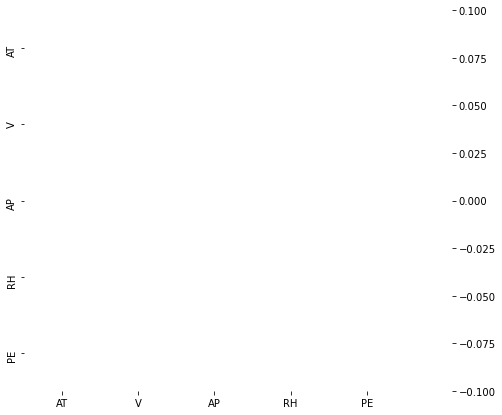

In [4]:
# quick EDA
# (1) correlation analysis
corr = power_data.corr()
# mask for heatmap in seaborn
mask = np.ones((power_data.shape[1], power_data.shape[1]))
mask = [[1 if j< i else 0
         for j in range(corr.shape[0])]
         for i in range(corr.shape[1])]
fig, ax = plt.subplots(figsize = (10, 7))
# plot the correlation matrix as a heatmap
# blanking out the upper triangle (duplicates)
sns.heatmap(corr, cmap = 'jet_r',
            square = True, 
            linewidths = 0.5, 
            center = 0, 
            annot = True, 
            mask = mask, 
            annot_kws = {"size" : 12}, 
            xticklabels = power_data.columns, 
            yticklabels = power_data.columns)
plt.show()

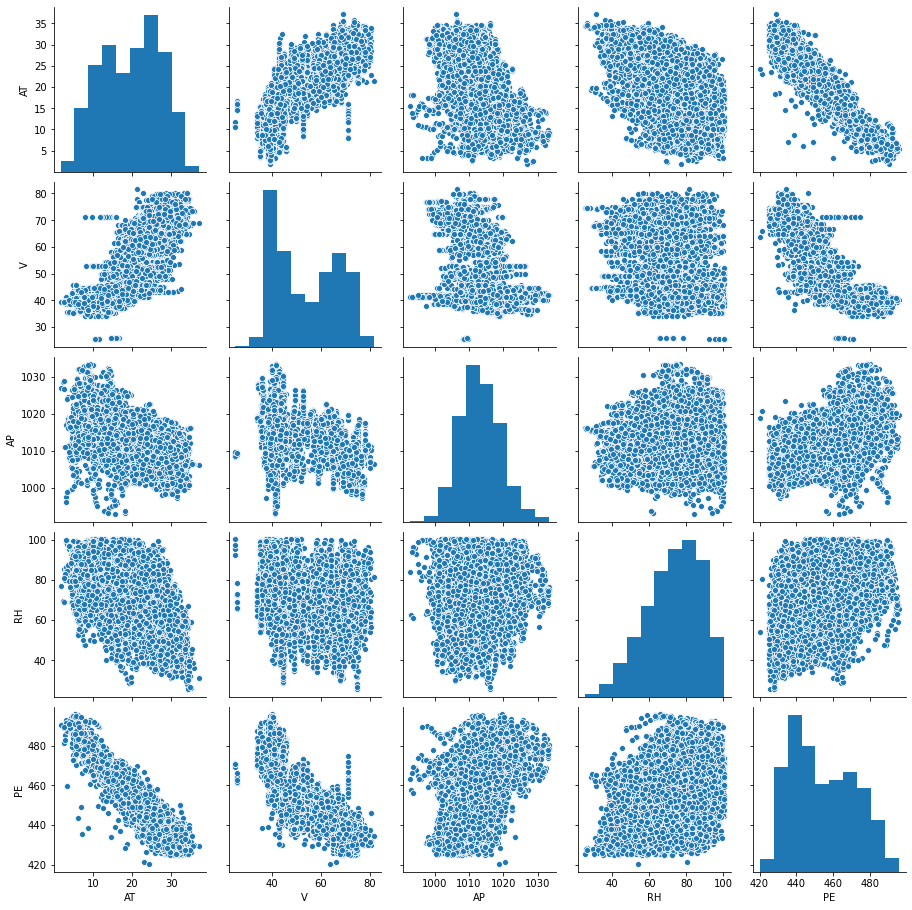

In [5]:
# (2) look at the pairwise variable relationships
plot_grid = sns.pairplot(power_data)

In [6]:
# structure data
X_train = power_data.drop('PE', axis = 1)
Y_train = power_data['PE']
# fit the model
model = LinearRegression()
model.fit(X_train, Y_train)
# get predictions
Y_pred = model.predict(X_train)
r2 = model.score(X_train, Y_train)
print('model coefficients ' + str(model.coef_))
print('r2 value ' + str(round(r2, 3)))

model coefficients [-1.97751311 -0.23391642  0.06208294 -0.1580541 ]
r2 value 0.929


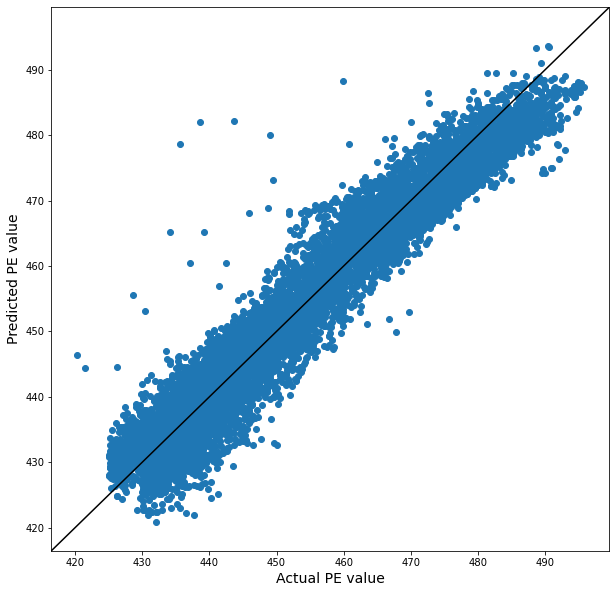

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
# set some limits
PE_range = max(power_data.PE) - min(power_data.PE)
plot_range = [min(power_data.PE) - 0.05 * PE_range,
           max(power_data.PE) + 0.05 * PE_range]
ax.scatter(Y_train, Y_pred)
ax.set_xlim(plot_range)
ax.set_ylim(plot_range)
ax.set_xlabel('Actual PE value', fontsize = 14)
ax.set_ylabel('Predicted PE value', fontsize = 14)
ax.plot(plot_range, plot_range, 
        c = "black")
plt.show()